## Модель цен на автомобили

Имеется набор данных с признаками автомобилей и ценами на них. Необходимо построить предсказание цены

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv( 'cars.csv', delimiter = '\t' )
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,1.0


Самое простое предположение, чтобы рисовать было удобнее

In [3]:
X = data[ ['Mileage'] ]
Y = data['Price']

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()

In [6]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
y_predict = model.predict(X)

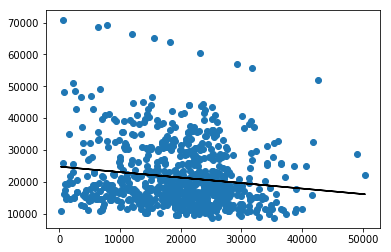

In [8]:
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.show()

Нужно что-то поумнее

In [9]:
X = pd.get_dummies(data.loc[:, ['Mileage', 'Liter', 'Make']])
X.head()

,Mileage,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221.0,3.1,1,0,0,0,0,0
1,9135.0,3.1,1,0,0,0,0,0
2,13196.0,3.1,1,0,0,0,0,0
3,16342.0,3.1,1,0,0,0,0,0
4,19832.0,3.1,1,0,0,0,0,0


In [10]:
Y = data.loc[ :, ['Price'] ]
Y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [11]:
model = LinearRegression()

In [12]:
model.fit(X, Y)
y_predict = model.predict(X)

Попробуем нарисовать как расходится факт с предсказаниями

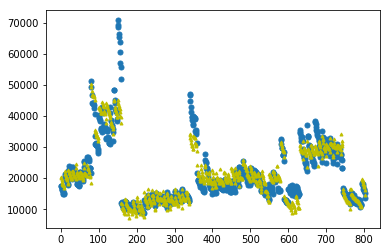

In [13]:
plt.plot(Y.index, Y, 'o', markersize = 5)
plt.plot(Y.index, y_predict, 'y^', markersize = 3)
plt.show()